### Basic DA

2025-06-12 09:45:47.068696: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


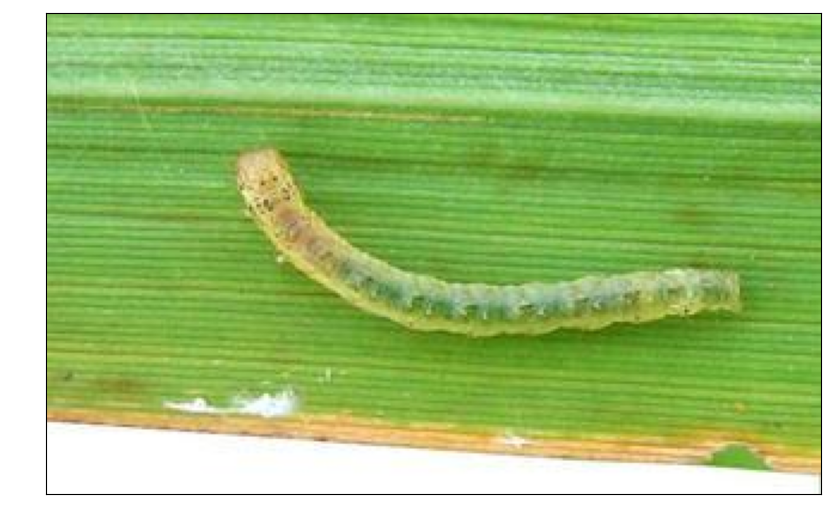

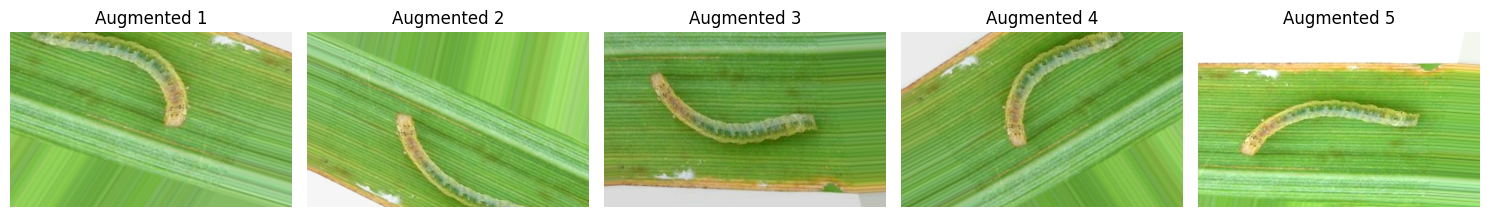

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img,img_to_array
import random

img_path = "IP102/ip102_v1.1/images/00015.jpg"
img = load_img(img_path)
img = np.array(img)
plt.figure(figsize = (10, 10))
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
plt.imshow(img)

p = {
    'rotation_range': 30,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 20,
    'zoom_range': (0.8, 1.2),
    'horizontal_flip': True,
    'vertical_flip': True,
    'brightness_range': (0.7, 1.3),
    'channel_shift_range': 15,
    'fill_mode': 'nearest',
    'interpolation_order': 1, # Bilinear
}


datagen = ImageDataGenerator(
    rotation_range=p['rotation_range'],
    width_shift_range=p['width_shift_range'],
    height_shift_range=p['height_shift_range'],
    shear_range=p['shear_range'],
    zoom_range=p['zoom_range'],
    horizontal_flip=p['horizontal_flip'],
    vertical_flip=p['vertical_flip'],
    brightness_range=p['brightness_range'],
    channel_shift_range=p['channel_shift_range'],
    fill_mode=p['fill_mode'],
    interpolation_order=p['interpolation_order']
)

img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

aug_iter = datagen.flow(img_array, batch_size=1)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns

for i in range(5):
    aug_img = next(aug_iter)[0].astype(np.uint8)
    axes[i].imshow(aug_img)
    axes[i].set_title(f'Augmented {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### CGAN-based DA